In [1]:
import pandas as pd
import sqlite3
import chess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Automatically reload modules when they change
%load_ext autoreload
%autoreload 2

In [2]:
connection = sqlite3.connect('chess_games.db')
cursor = connection.cursor()

In [3]:
#Extract the dataset
cursor.execute('''SELECT game_id, move, move_number FROM moves
               LIMIT 1000000
               ;''')
moves = cursor.fetchall()
moves_df = pd.DataFrame(moves, columns=['game_id', 'move', 'move_number'])
moves = moves_df.groupby('game_id')['move'].apply(list).to_numpy()
print(moves[:10])
print(f"shape: {moves.shape}")

[list(['d2d4', 'f7f5', 'g2g3', 'g7g6', 'f1g2', 'f8g7', 'g1f3', 'd7d6', 'c2c3', 'e7e6', 'a2a4', 'g8f6', 'd1c2', 'd8e7', 'b1d2', 'e6e5', 'd4e5', 'd6e5', 'e2e4', 'b8c6', 'e1g1', 'f5e4', 'd2e4', 'c8f5', 'f3d2', 'e8c8', 'b2b4', 'g7h6', 'f1e1', 'h6d2', 'c1d2', 'f6e4', 'g2e4', 'e7e6', 'd2g5', 'd8d6', 'a1d1', 'd6d1', 'e1d1', 'h7h6', 'g5e3', 'a7a5', 'c2b1', 'h6h5', 'b4b5', 'c6e7', 'e3g5', 'h8e8', 'h2h4', 'e6c4', 'd1e1', 'f5e4', 'e1e4', 'c4e6', 'g5f4', 'e6f5', 'f4e5', 'e7d5', 'b1e1', 'd5b6', 'f2f4', 'b6d7', 'e1e2', 'b7b6', 'e4e3', 'e8e7', 'e3e4', 'd7c5', 'e4d4', 'e7d7', 'g1g2', 'c8d8', 'g2h2', 'd8c8', 'e2g2', 'c8b8', 'g2a2', 'b8a7', 'a2g2', 'a7b8', 'g2e2', 'b8c8', 'e2f3', 'c8b8', 'f3d1', 'b8c8', 'd1e2', 'c8b8', 'e2d1', 'b8b7', 'd4d7', 'c5d7', 'e5d4', 'd7c5', 'h2g2', 'f5d5', 'g2g1', 'd5f5', 'd4c5', 'f5c5', 'd1d4', 'c5f5', 'd4d2', 'f5b1', 'g1f2', 'b1b3', 'd2d4', 'b3c2', 'f2e3', 'b7c8', 'd4h8', 'c8b7', 'h8d4', 'b7b8', 'd4d8', 'b8b7', 'd8d5', 'b7b8', 'd5g8', 'b8b7', 'g8c4', 'b7b8', 'c4g8', 'b8b7', '

In [6]:
from utils.MovePlotter import MovePlotter

move: d2d4
moveVec: (3, 6) (3, 4)


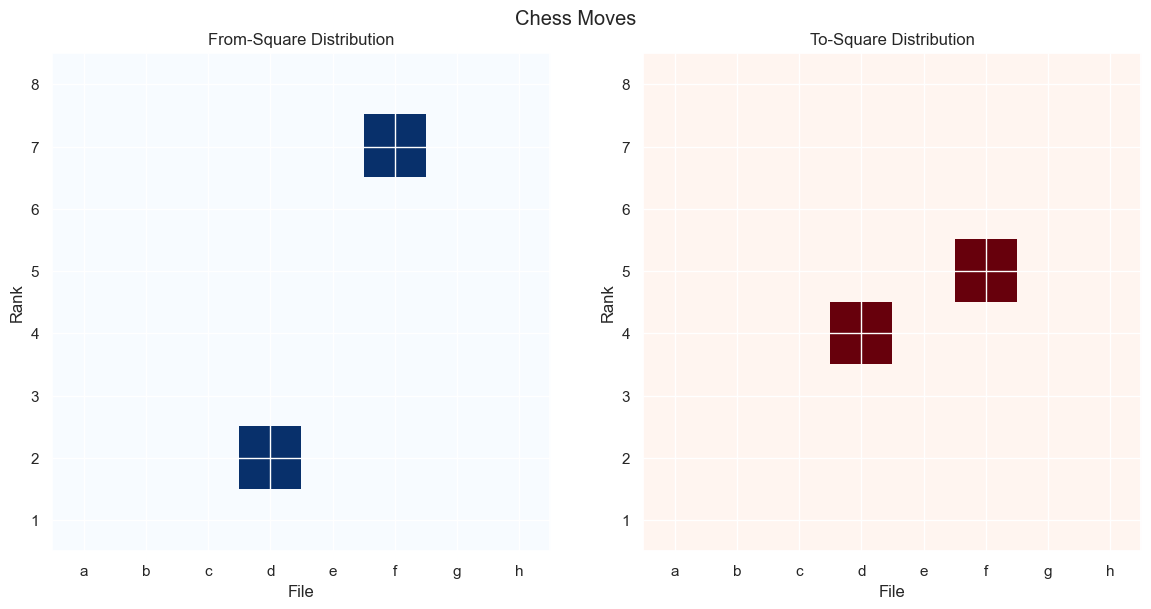

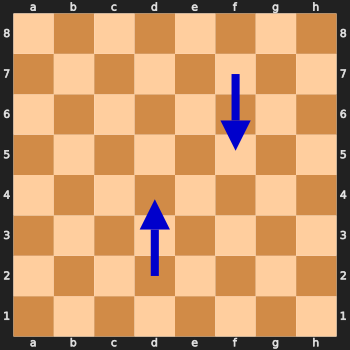

In [7]:
plotter = MovePlotter("Chess Moves")
plotter.addMove(moves[0][0])
plotter.addMove(moves[0][1])
print("move:", moves[0][0])
print("moveVec:", plotter.moveToIndex(moves[0][0][:2]), plotter.moveToIndex(moves[0][0][2:4]))
plotter.plot()

In [10]:
from gensim.models.word2vec import Word2Vec

In [ ]:
model = Word2Vec(moves, vector_size=100, window=100, sg=1)
wordVectors = model.wv.vectors
wordVectors.shape

NameError: name 'Word2Vec' is not defined

In [ ]:
#Print the model dictionary
dictionaty = np.array(model.wv.index_to_key)
vectors = model.wv.vectors
print(f'Vectors shape: {vectors.shape}')
vectorsNormalized = vectors / np.linalg.norm(vectors, axis=1, keepdims=True)
startingLetter = [ord(move[3]) for move in dictionaty]
print(startingLetter[:10])

Vectors shape: (1829, 100)
[52, 51, 54, 54, 56, 54, 51, 49, 52, 51]


In [ ]:
from utils.ChessMoveVisualizer import ChessMoveVisualizer
ChessMoveVisualizer(model, board_size=350, n_similar_moves=10)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01^\x00\x00\x01^\x08\x06\x00\x00\x00\xcd+w\x1a\x00\…

Text(value='', description='Move:', placeholder='e.g., e2e4')

Button(description='Make Move', style=ButtonStyle())

Output()

In [ ]:
model.wv.most_similar('a2a3', topn=10)

[('a3a4', 0.8140385150909424),
 ('a7a5', 0.8013888597488403),
 ('g2g3', 0.7963828444480896),
 ('f2f3', 0.7860980033874512),
 ('e2e3', 0.7765218615531921),
 ('a5a4', 0.7737535238265991),
 ('b2b4', 0.7686352133750916),
 ('h2h4', 0.7669108510017395),
 ('h2h3', 0.7625764608383179),
 ('b2b3', 0.7623671293258667)]

(1829, 1829)


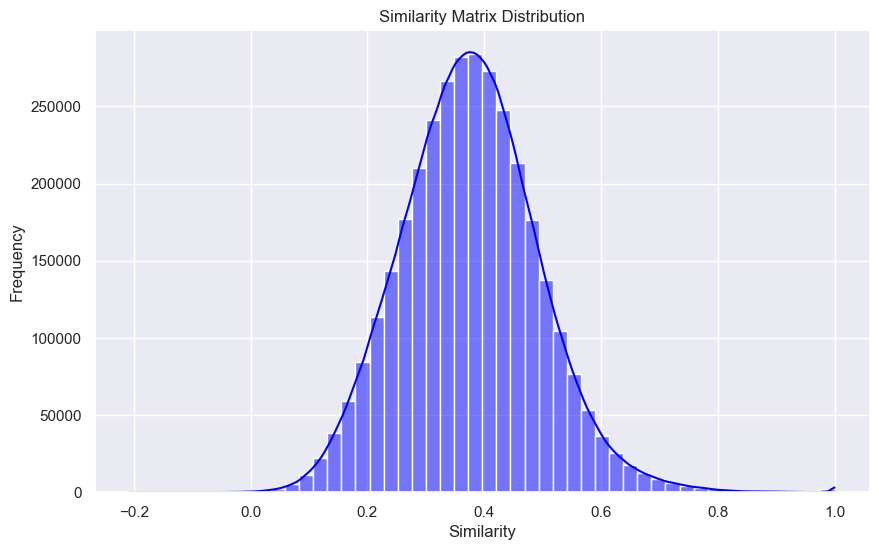

In [ ]:
#Compute the similarity matrix
vectorsSelections = vectorsNormalized
dictionatySelections = dictionaty
similarityMatrix = vectorsSelections @ vectorsSelections.T
print(similarityMatrix.shape)

#plot the similarity matrix distribution using sns
plt.figure(figsize=(10, 6))
plt.title('Similarity Matrix Distribution')
sns.histplot(similarityMatrix.flatten(), bins=50, kde=True, color='blue')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.show()

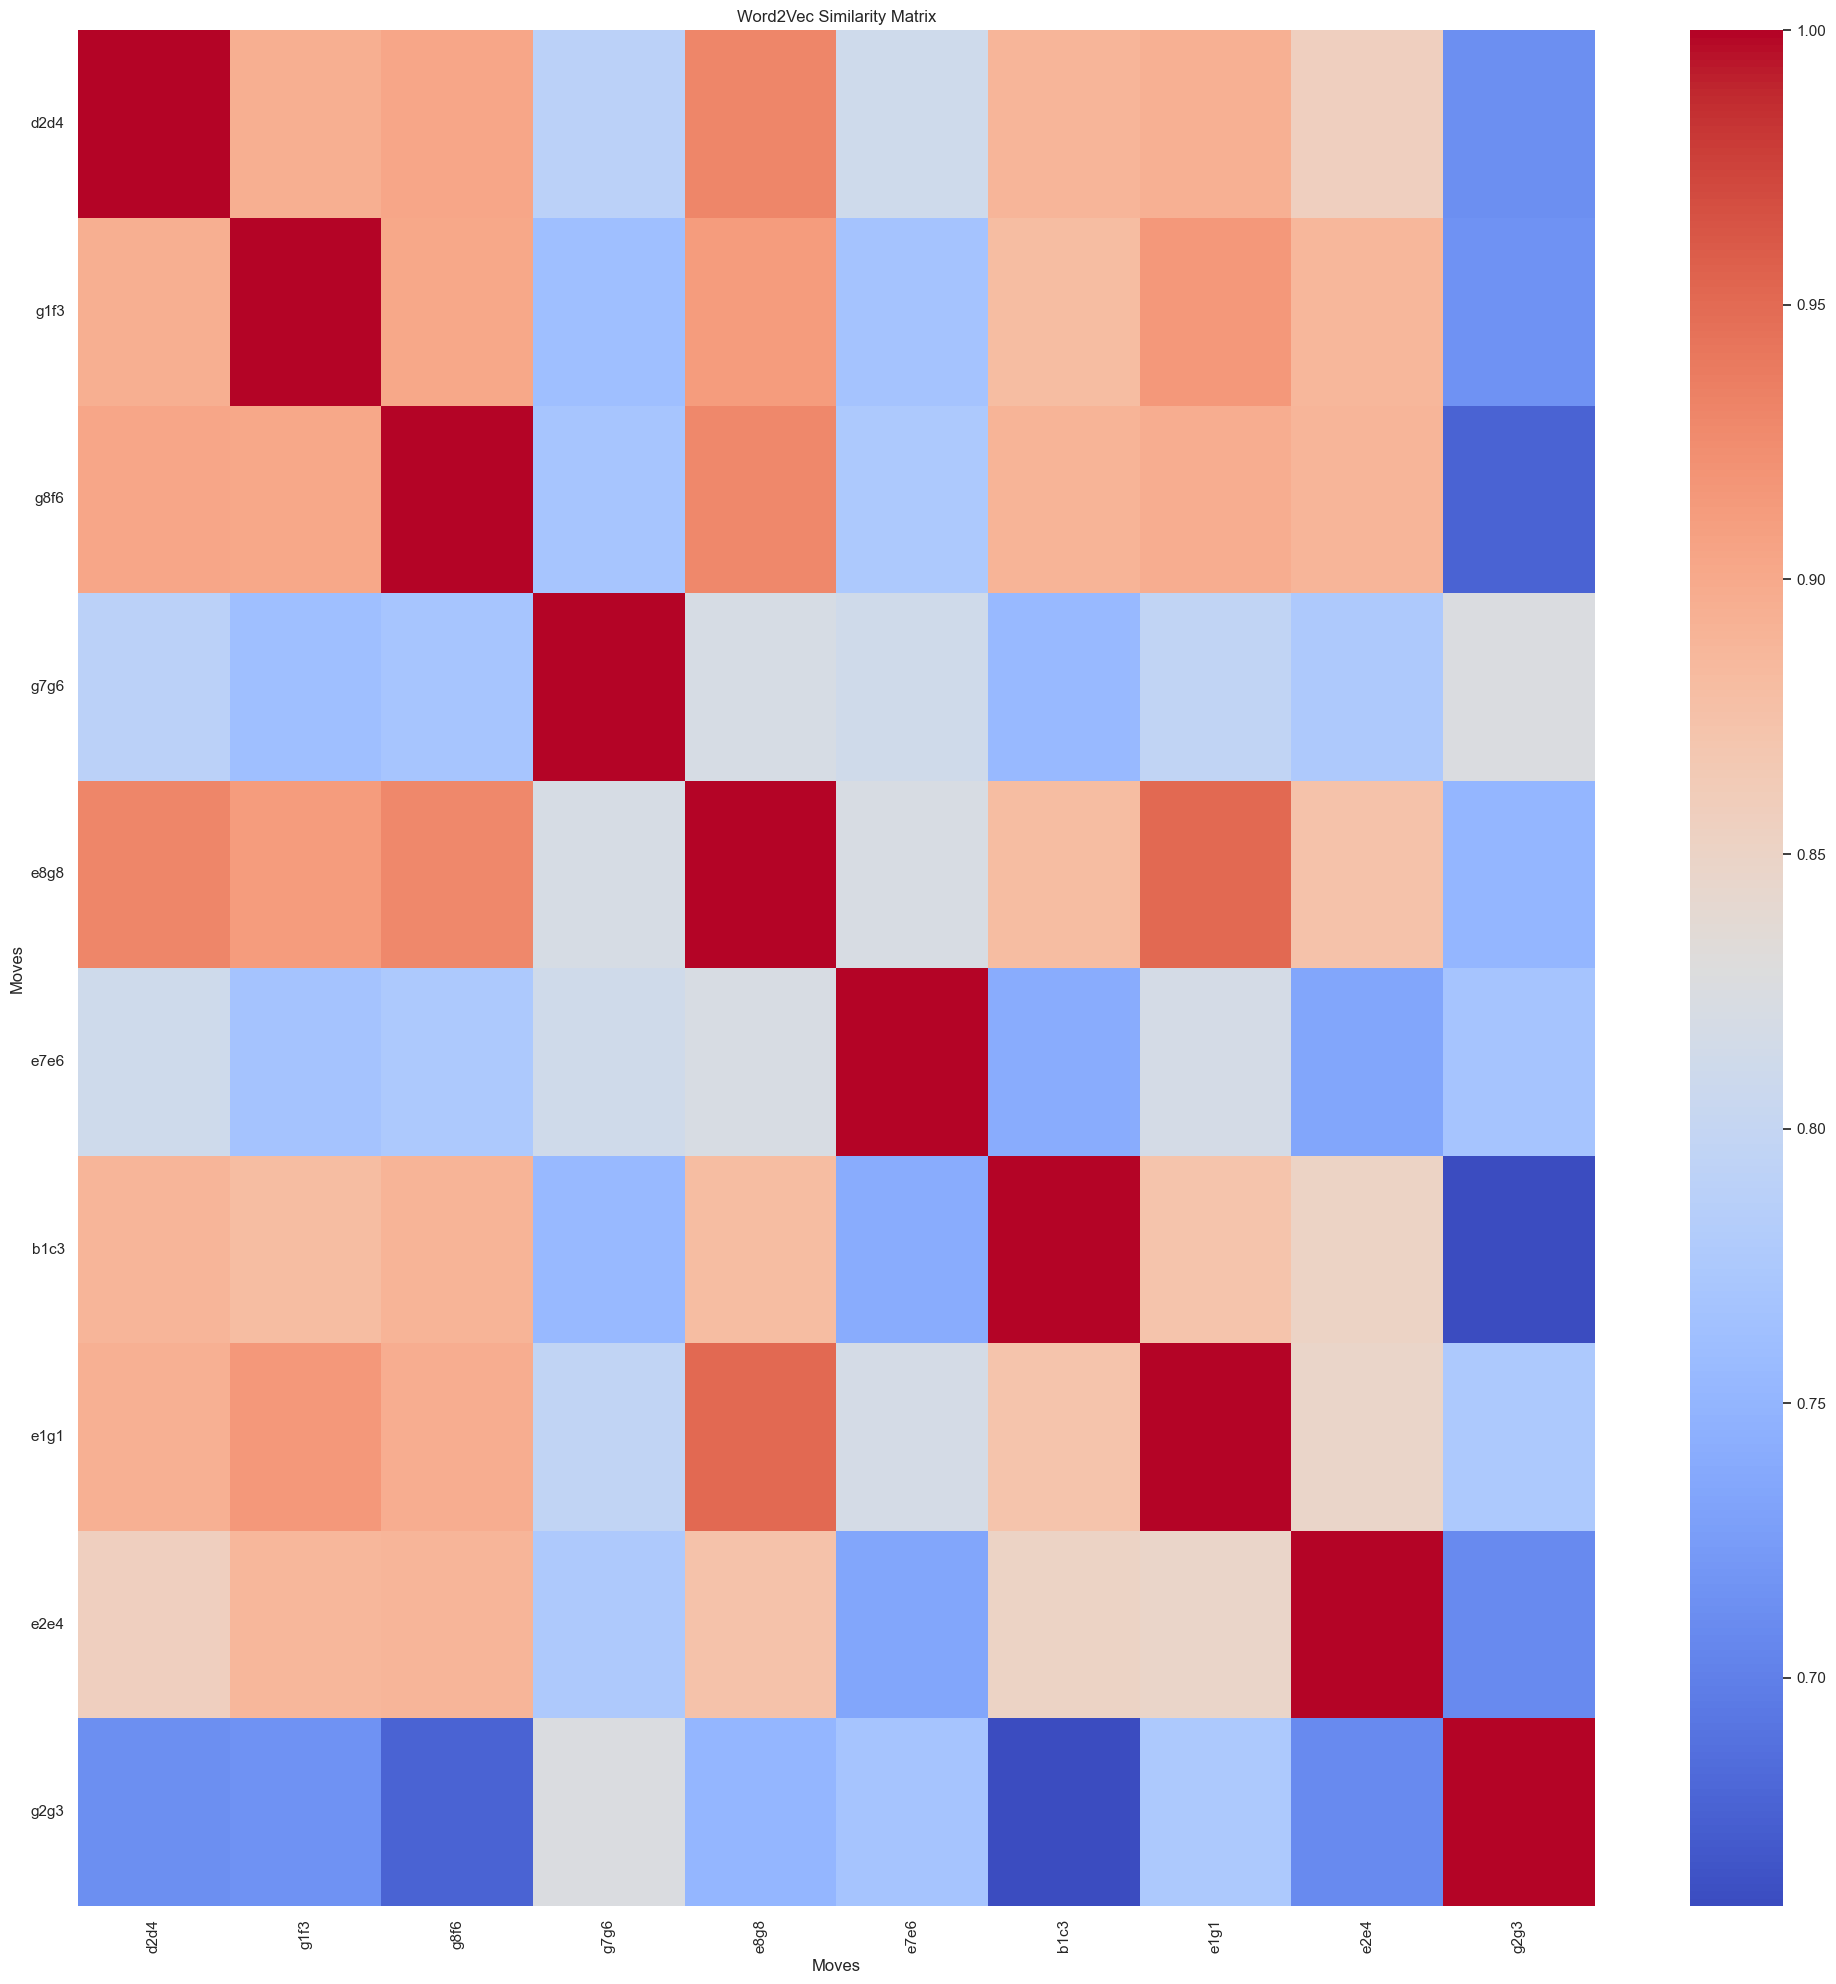

In [ ]:
# Plot the similarity matrix using seaborn
nVectors = 10
plt.figure(figsize=(20, 20))
sns.heatmap(similarityMatrix[:nVectors, :nVectors], xticklabels=dictionatySelections[:nVectors],
            yticklabels=dictionatySelections[:nVectors], cmap='coolwarm')
plt.title('Word2Vec Similarity Matrix')
plt.xlabel('Moves')
plt.ylabel('Moves')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

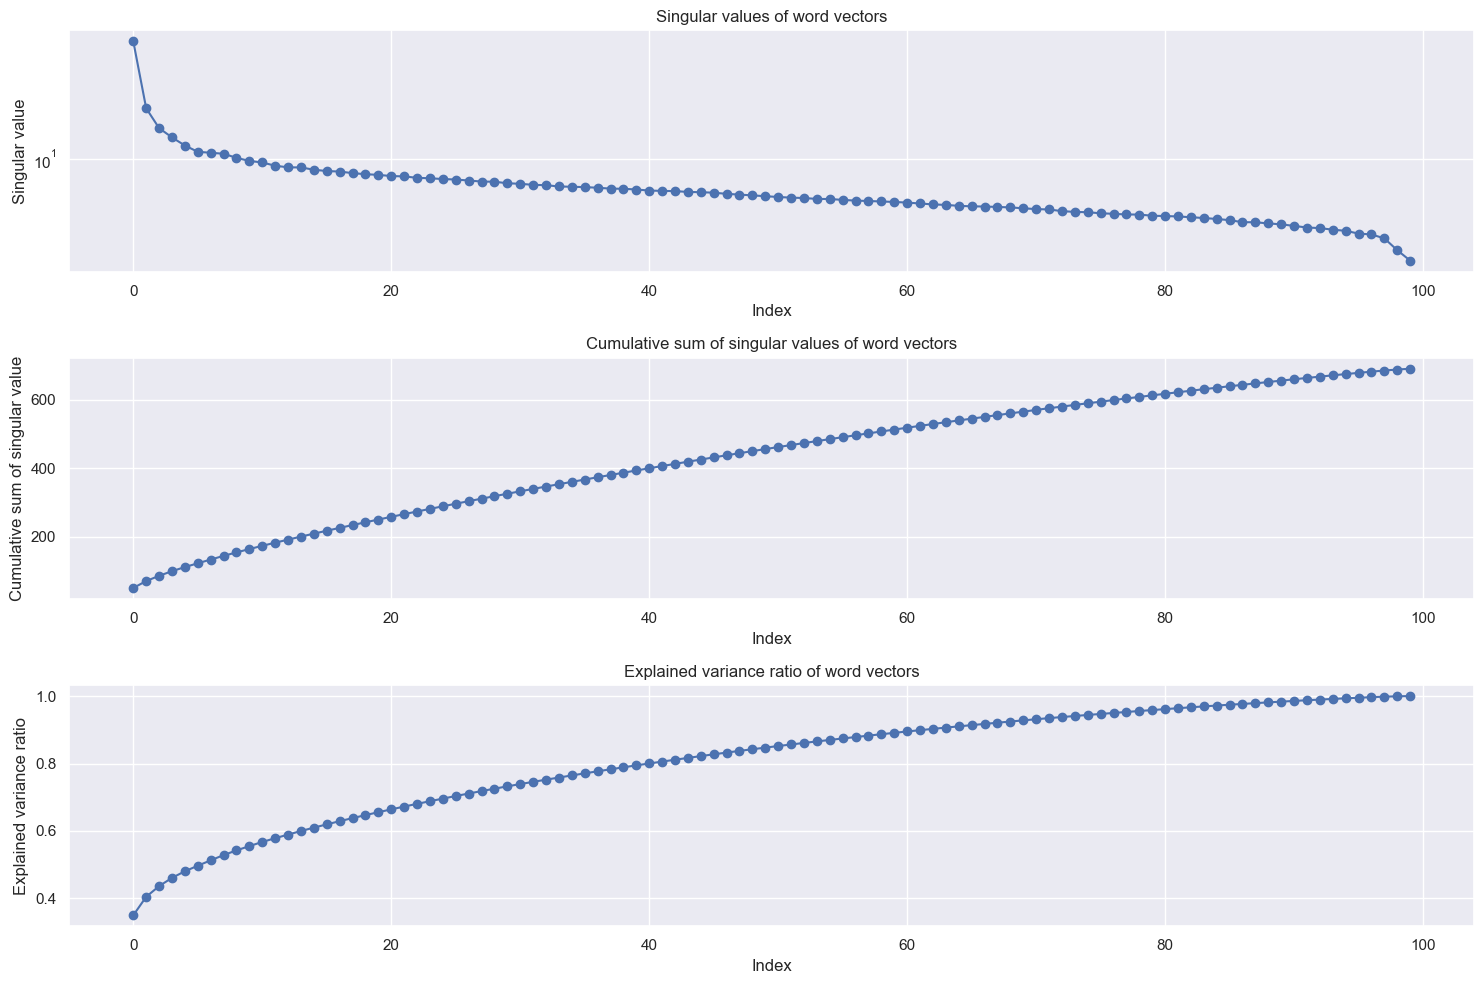

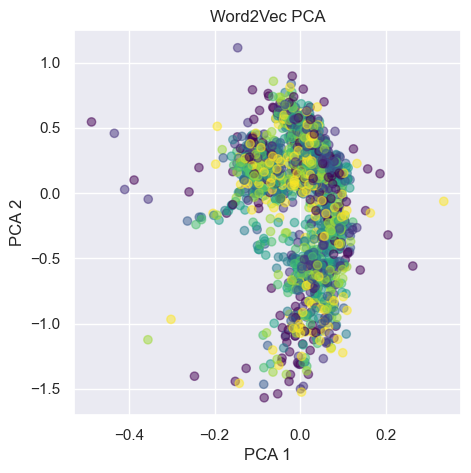

In [ ]:
#PCA over the word vectors
wordVectorsCentered = wordVectors - np.mean(wordVectors, axis=0)
U, s, Vt = np.linalg.svd(wordVectors, full_matrices=False)
# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot the singular values
axes[0].semilogy(s, 'o-')
axes[0].set_title('Singular values of word vectors')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Singular value')

# Plot the cumulative sum of the singular values
axes[1].plot(np.cumsum(s), 'o-')
axes[1].set_title('Cumulative sum of singular values of word vectors')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Cumulative sum of singular value')

# Plot the explained variance ratio
axes[2].plot(np.cumsum(s**2) / np.sum(s**2), 'o-')
axes[2].set_title('Explained variance ratio of word vectors')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Explained variance ratio')

# Adjust layout
plt.tight_layout()

plt.show()


wordVectorsPCA = np.dot(wordVectorsCentered, Vt.T)
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsPCA[:, 0], wordVectorsPCA[:, 1], alpha=0.5, c = startingLetter, cmap='viridis')
plt.title('Word2Vec PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


c:\Polimi\Master\2Sem\NLP-Project\.conda\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


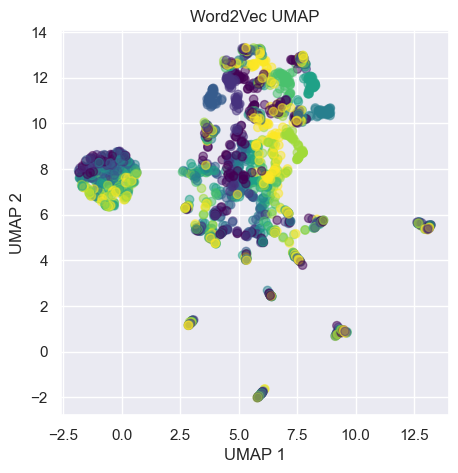

In [ ]:
#umap projection
import umap

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
embedding = reducer.fit_transform(wordVectors)
plt.figure(figsize=(5, 5))
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5, c = startingLetter, cmap='viridis')
plt.title('Word2Vec UMAP')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


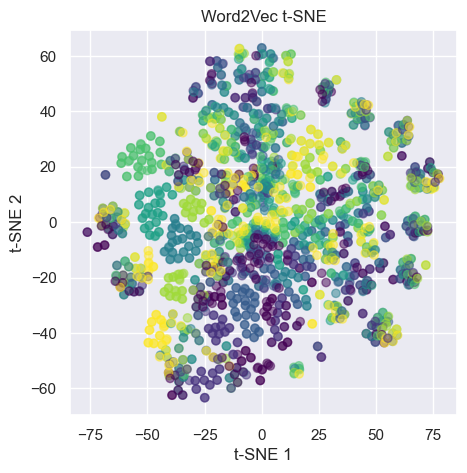

In [ ]:
# tsne over the word vectors
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30)

wordVectorsTSNE = tsne.fit_transform(wordVectors)
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], alpha=0.5, c= startingLetter, cmap='viridis')
plt.title('Word2Vec t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

For n_clusters = 2, the silhouette score is: 0.0824
For n_clusters = 3, the silhouette score is: 0.0681
For n_clusters = 4, the silhouette score is: 0.0698
For n_clusters = 5, the silhouette score is: 0.0713
For n_clusters = 6, the silhouette score is: 0.0400
For n_clusters = 7, the silhouette score is: 0.0166
For n_clusters = 8, the silhouette score is: 0.0201
For n_clusters = 9, the silhouette score is: 0.0069
For n_clusters = 10, the silhouette score is: 0.0157
For n_clusters = 11, the silhouette score is: 0.0060
For n_clusters = 12, the silhouette score is: 0.0151
For n_clusters = 13, the silhouette score is: 0.0180
For n_clusters = 14, the silhouette score is: 0.0315
For n_clusters = 15, the silhouette score is: 0.0297
For n_clusters = 16, the silhouette score is: 0.0289
For n_clusters = 17, the silhouette score is: 0.0215
For n_clusters = 18, the silhouette score is: 0.0355
For n_clusters = 19, the silhouette score is: 0.0369
For n_clusters = 20, the silhouette score is: 0.0335
F

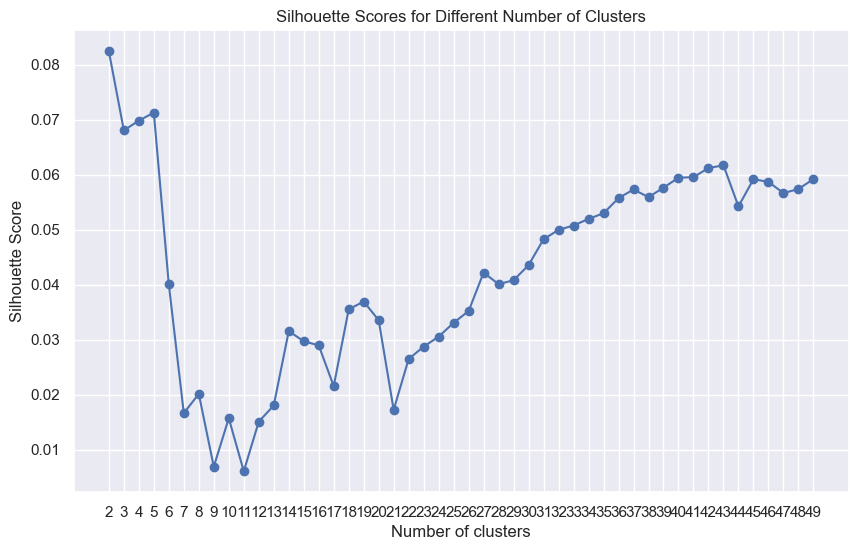

Best number of clusters: 2
Number of clusters: 2


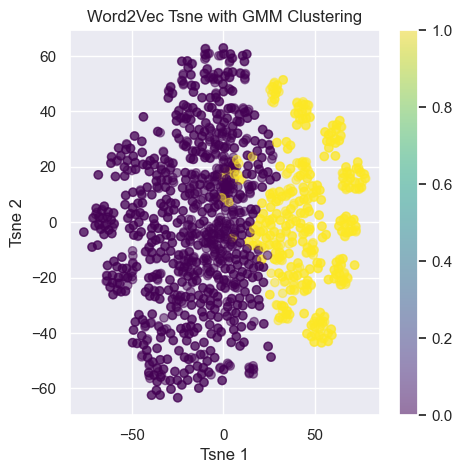

In [ ]:
#Perform gaussian mixture model clustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# Apply the elbow method to find the optimal number of clusters using silhouette scores
silhouette_scores = []
range_n_clusters = range(2, 30)
for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    cluster_labels = gmm.fit_predict(wordVectors)
    silhouette_avg = silhouette_score(wordVectors, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.show()

# Find the optimal number of clusters
best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Best number of clusters: {best_n_clusters}")

# Fit the GMM with the optimal number of clusters
gmm = GaussianMixture(n_components=best_n_clusters, random_state=0)
gmm.fit(wordVectors)
clusters = gmm.predict(wordVectors)
#Print the number of clusters
print(f'Number of clusters: {len(np.unique(clusters))}')
#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec Tsne with GMM Clustering')
plt.xlabel('Tsne 1')
plt.ylabel('Tsne 2')
plt.colorbar()
plt.show()

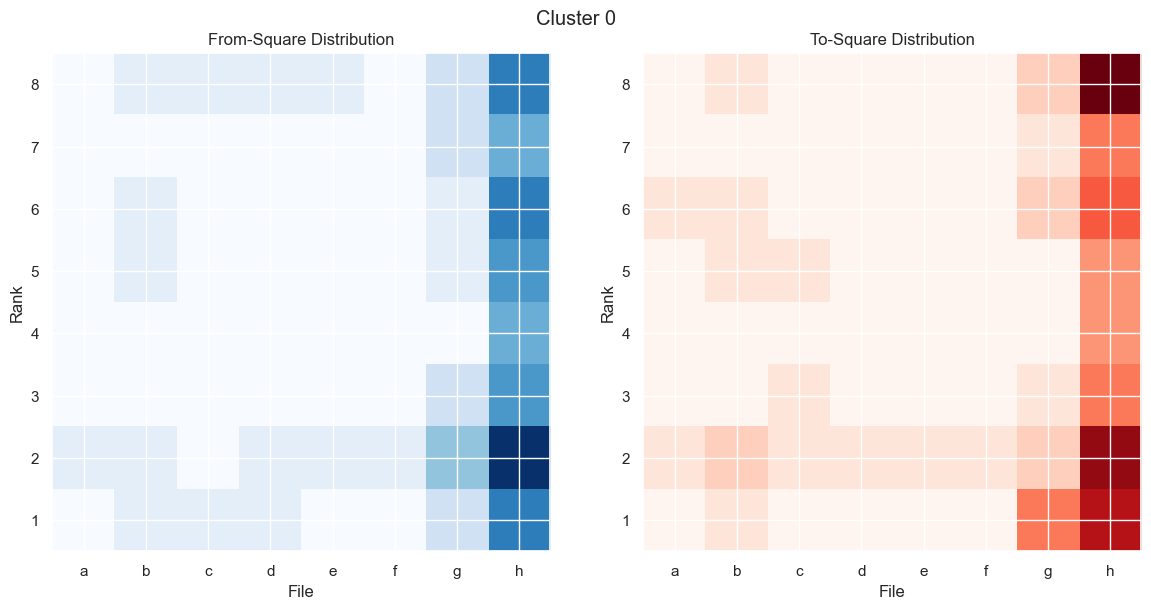

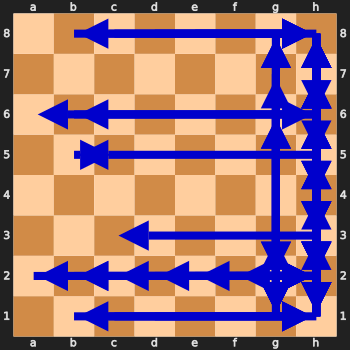

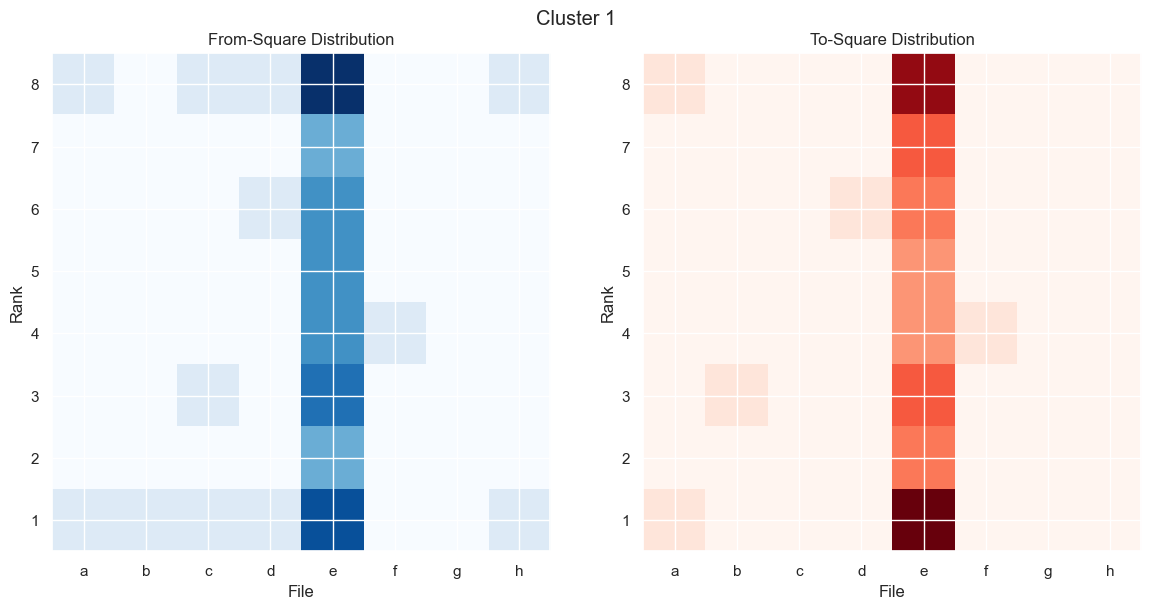

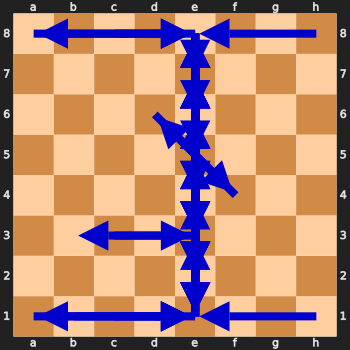

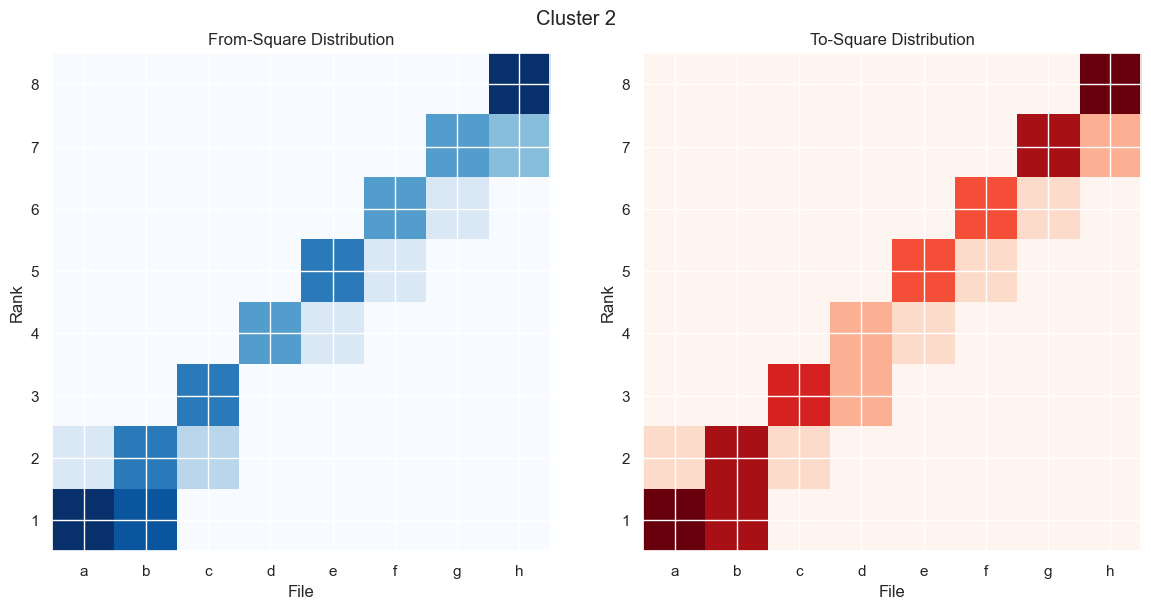

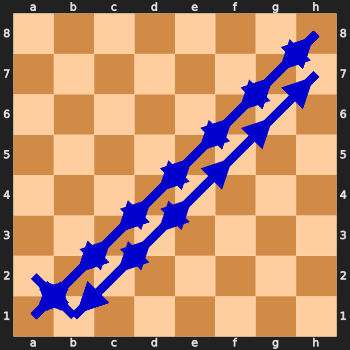

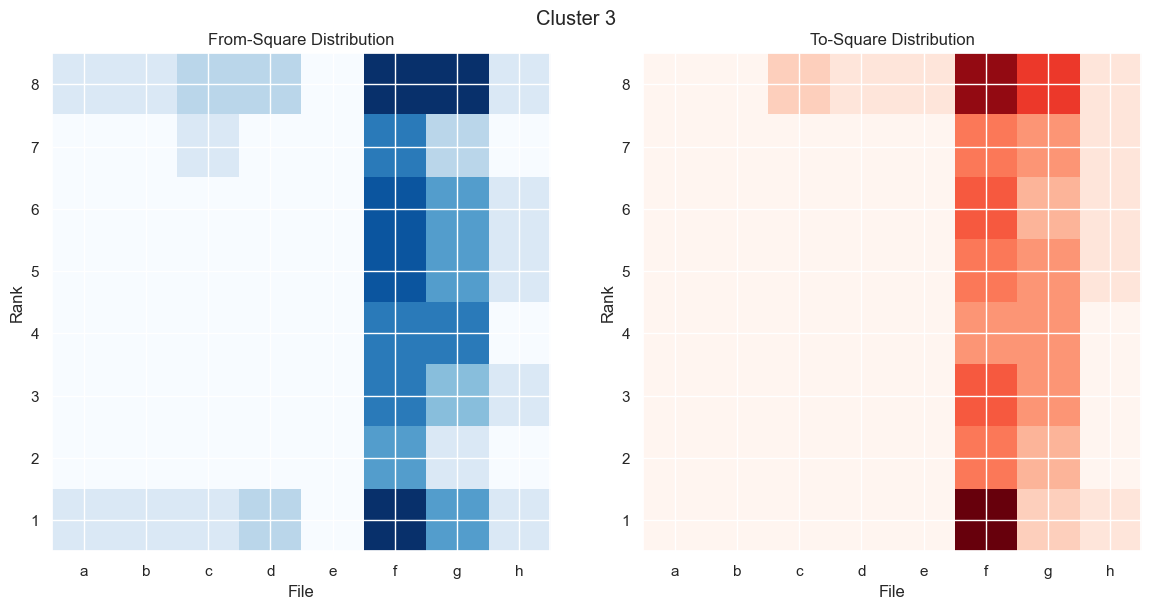

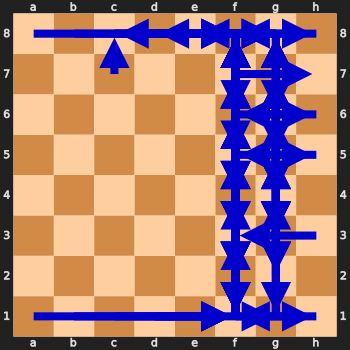

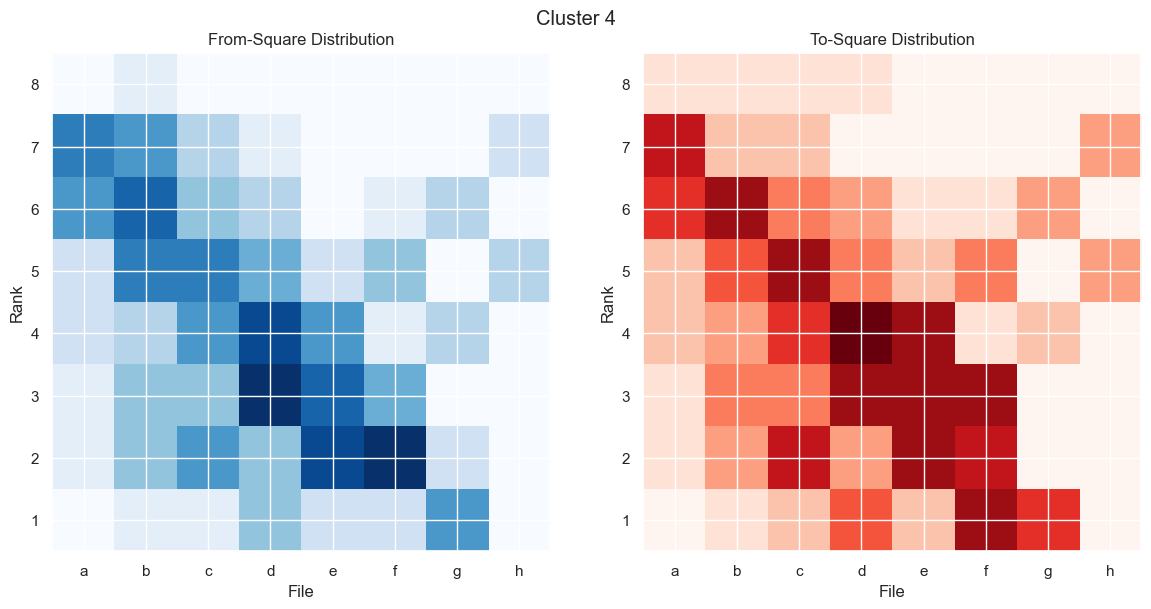

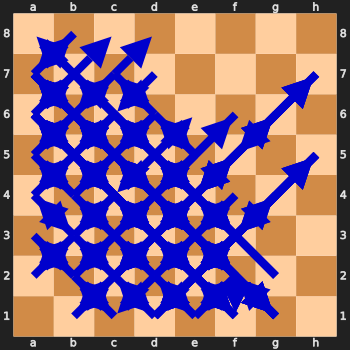

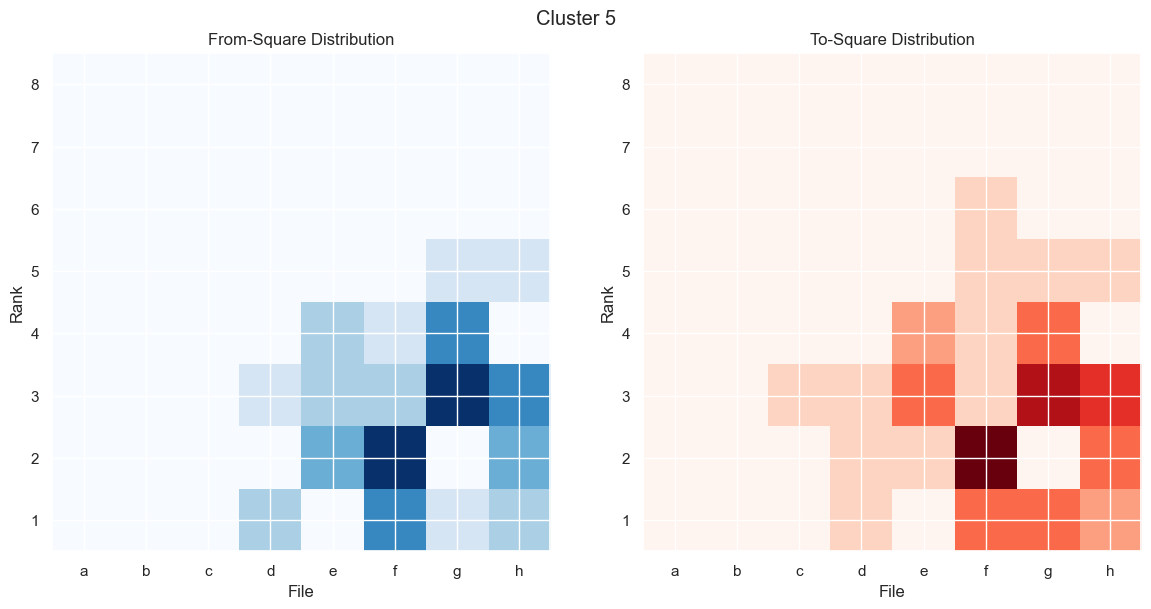

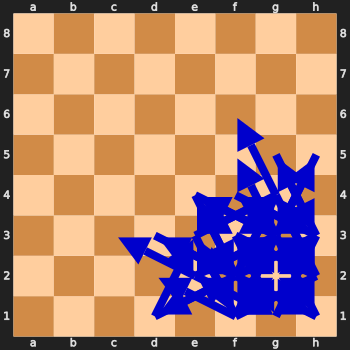

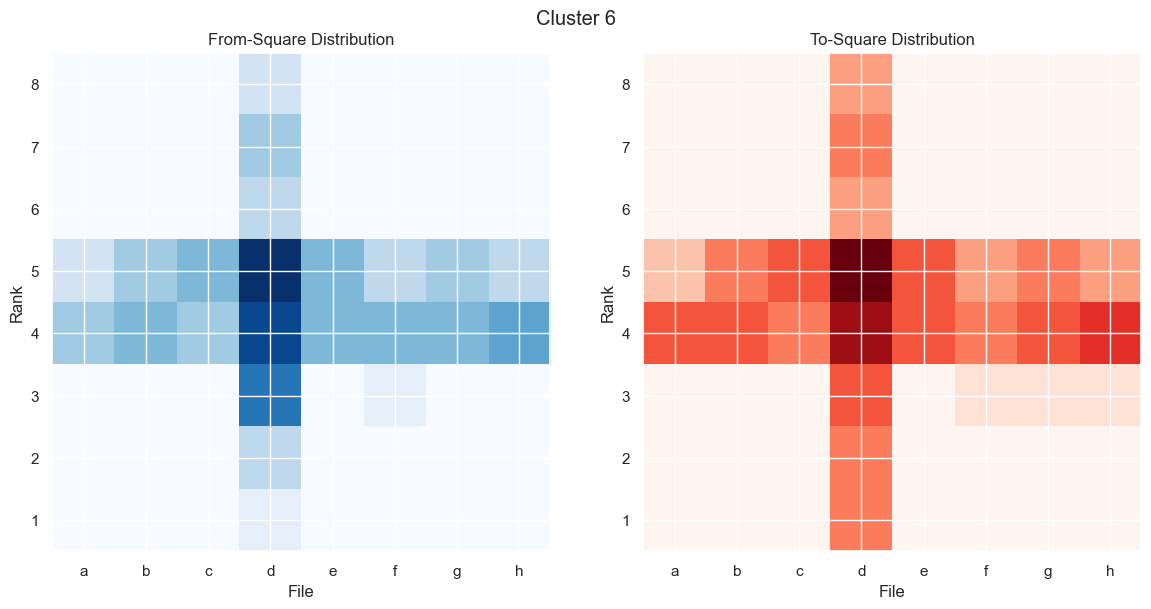

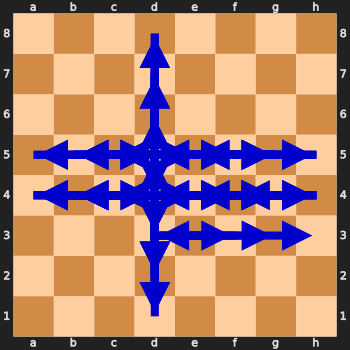

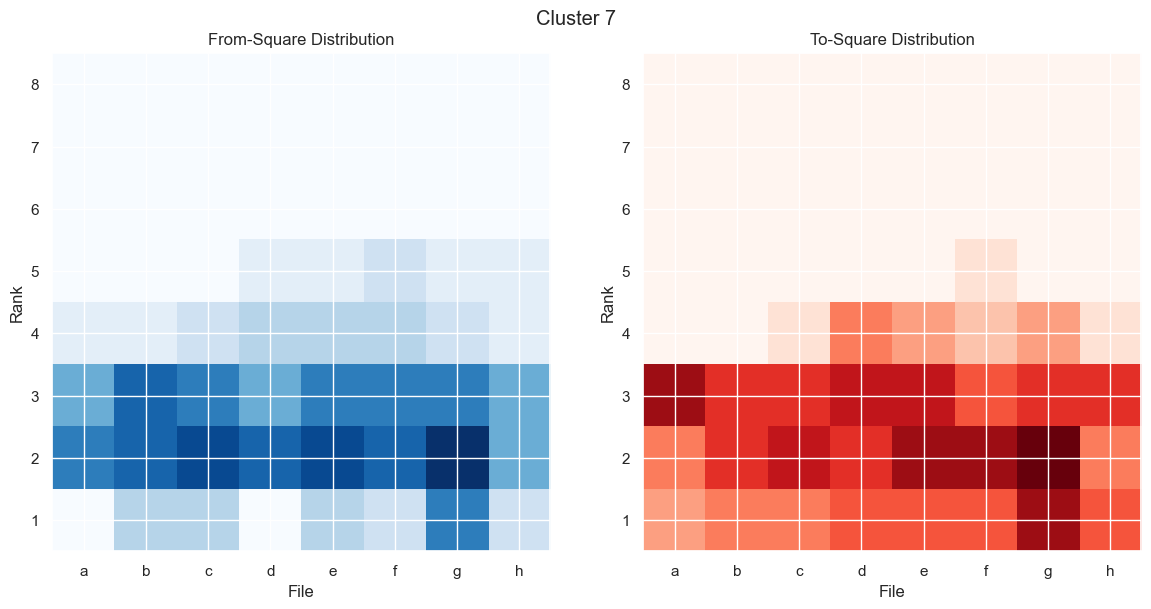

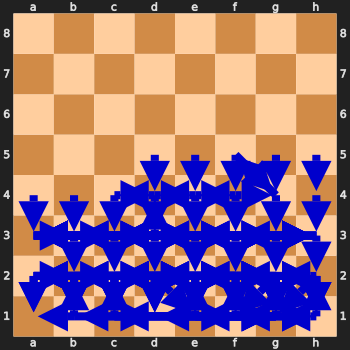

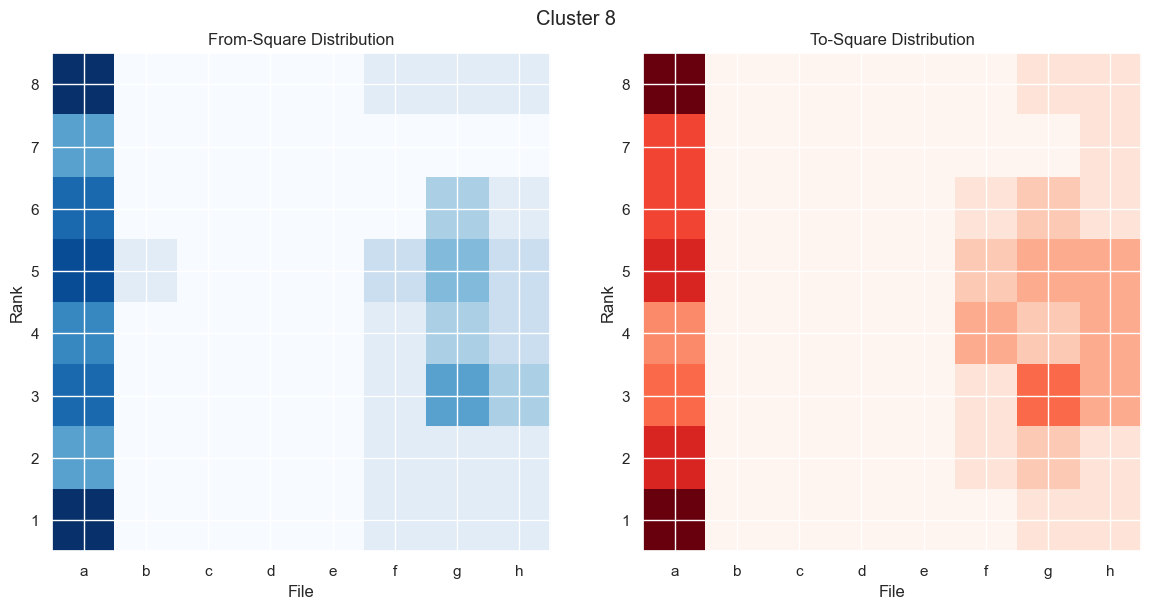

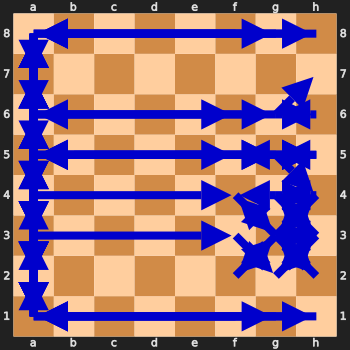

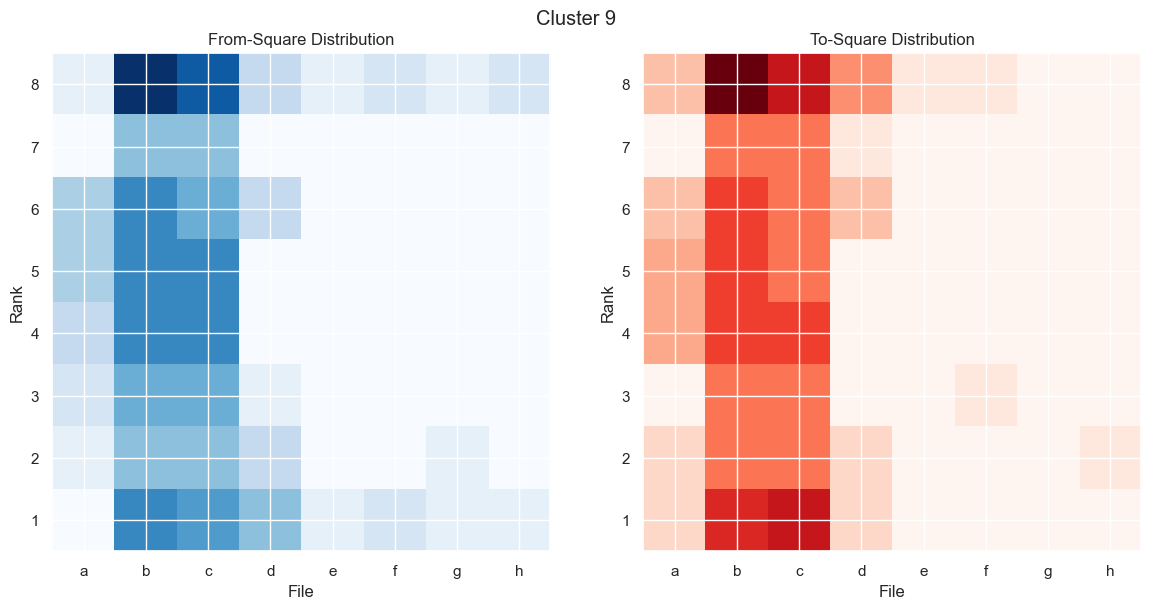

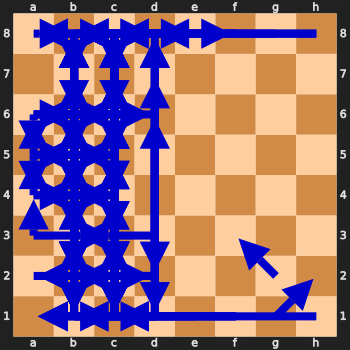

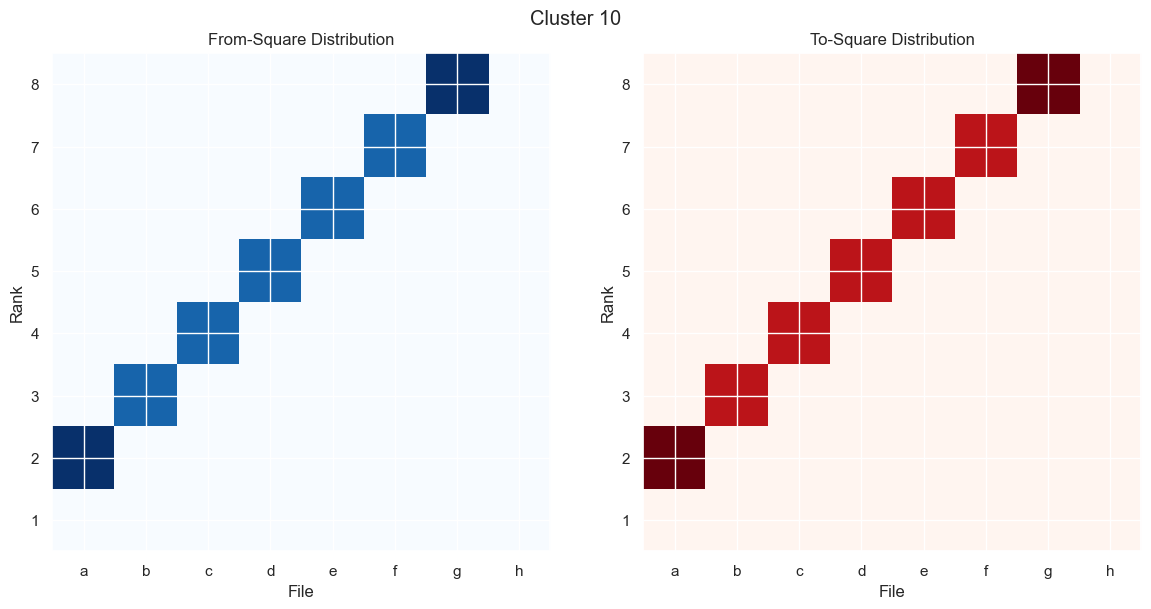

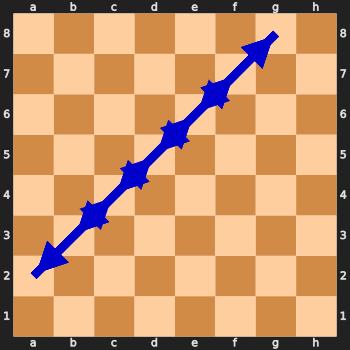

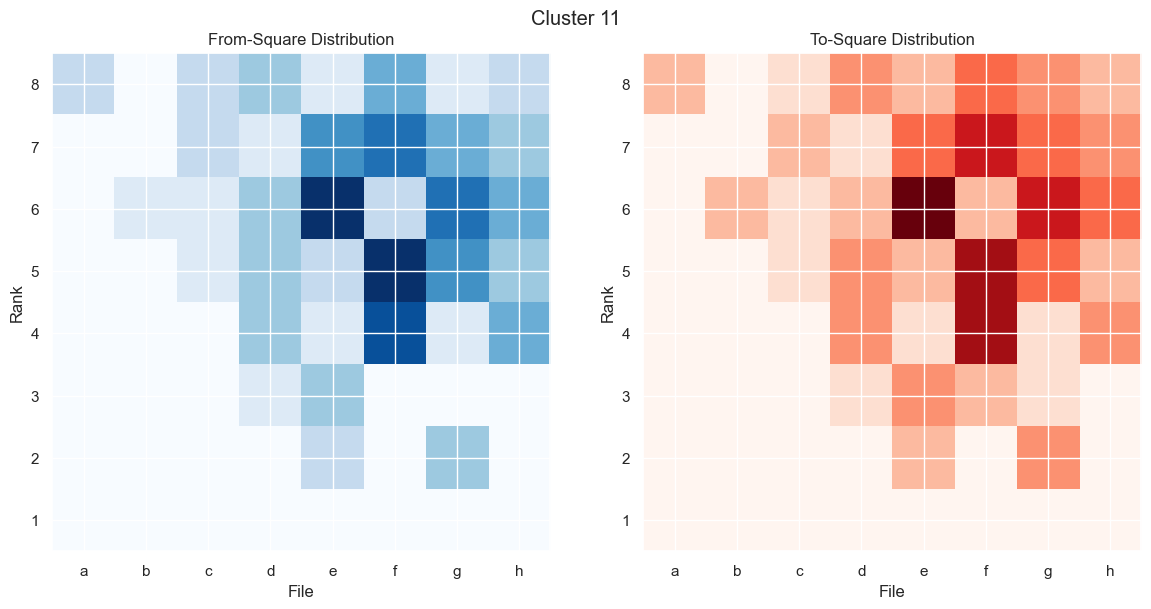

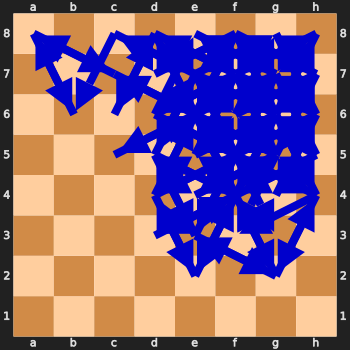

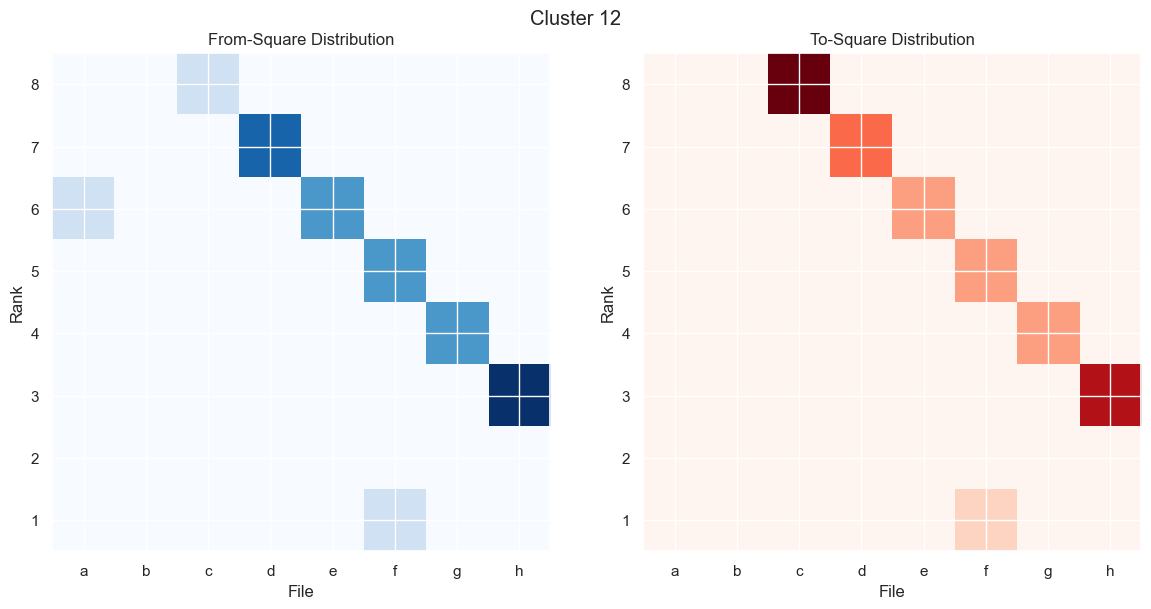

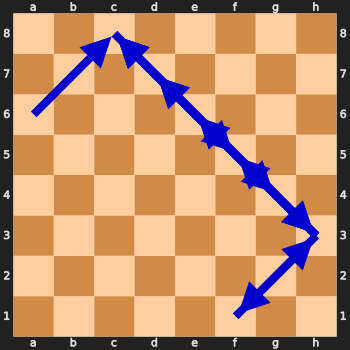

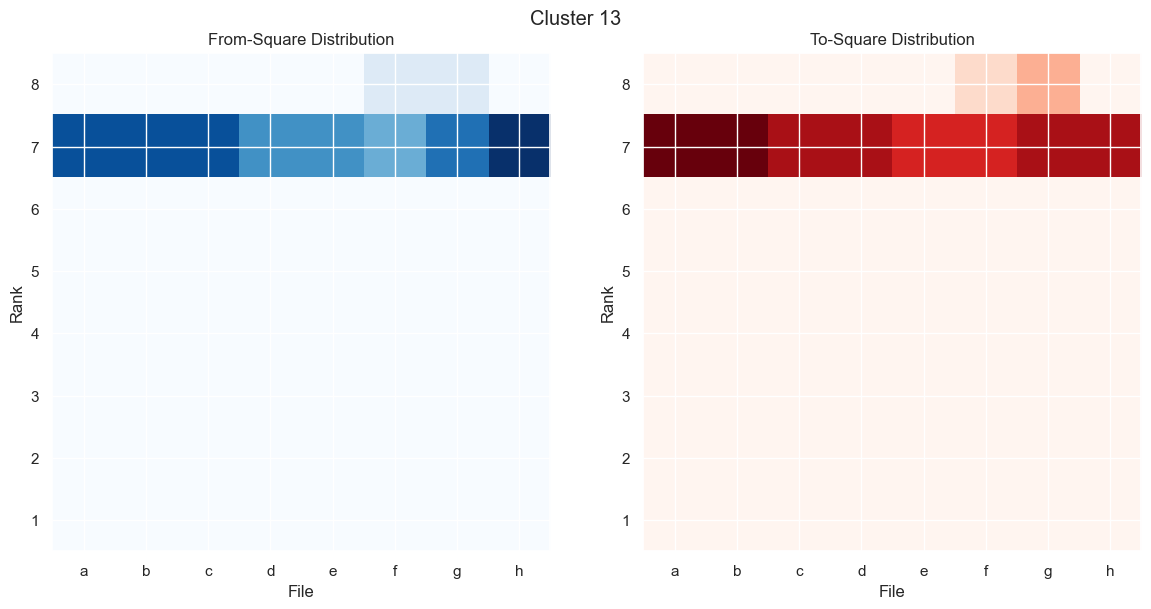

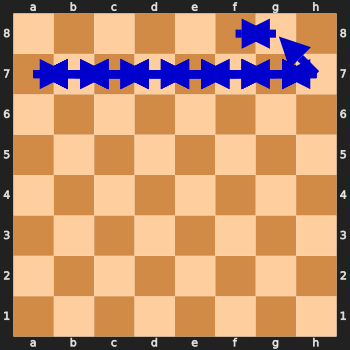

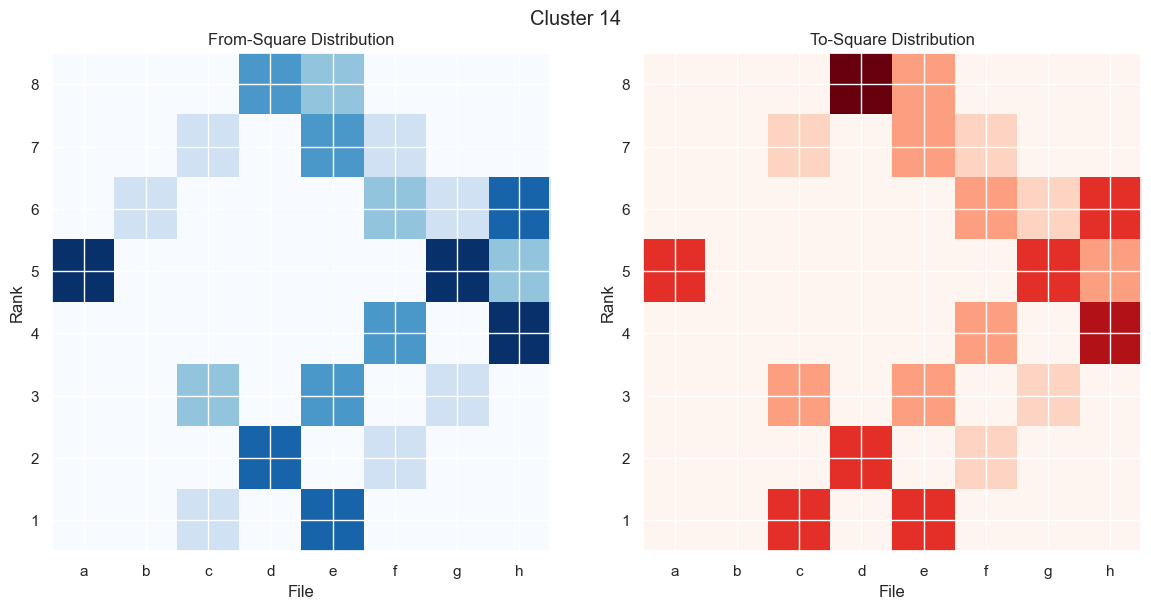

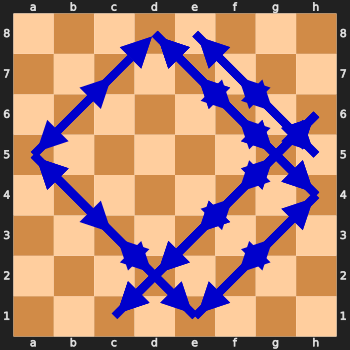

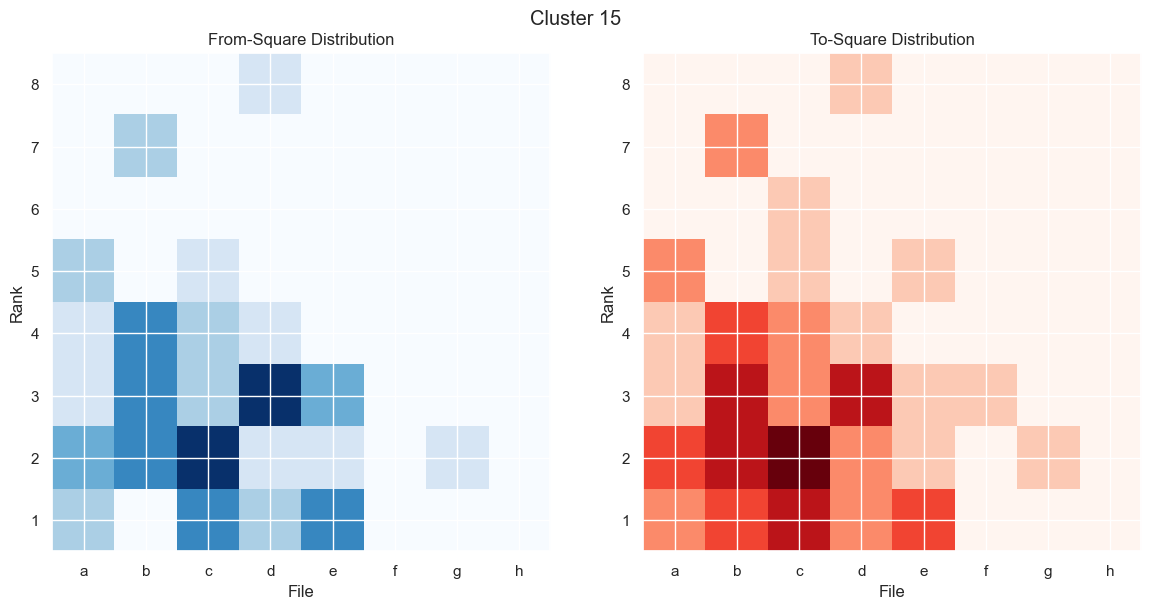

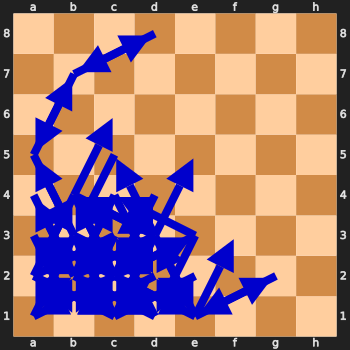

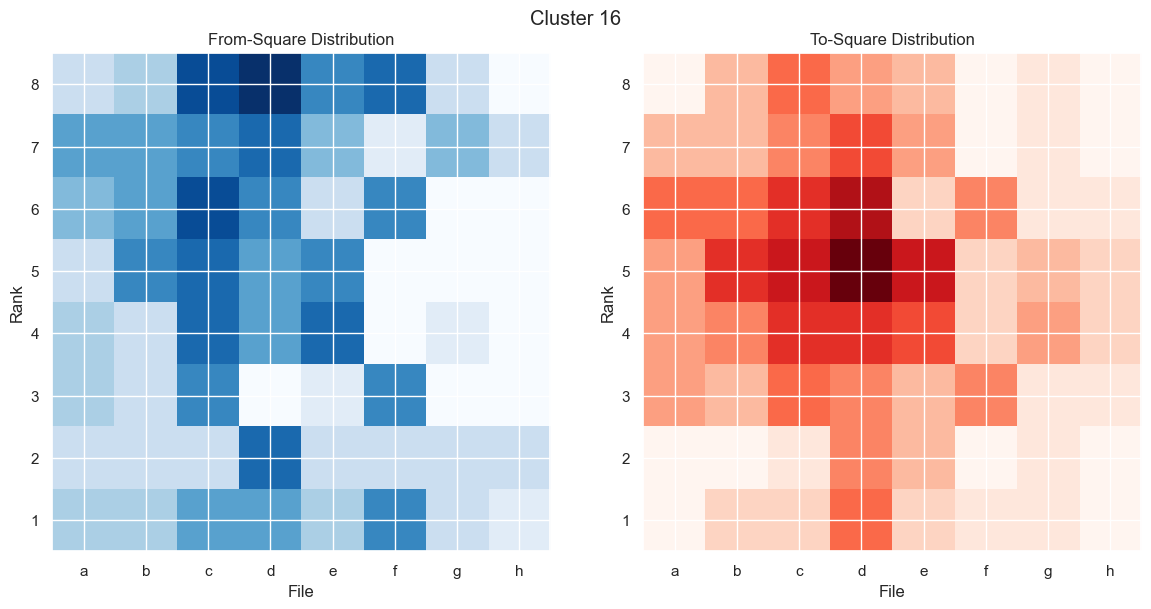

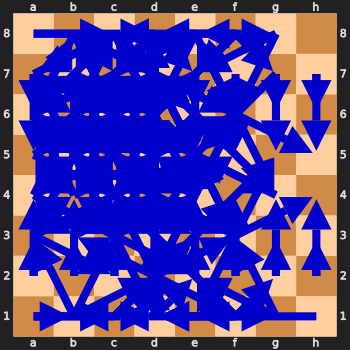

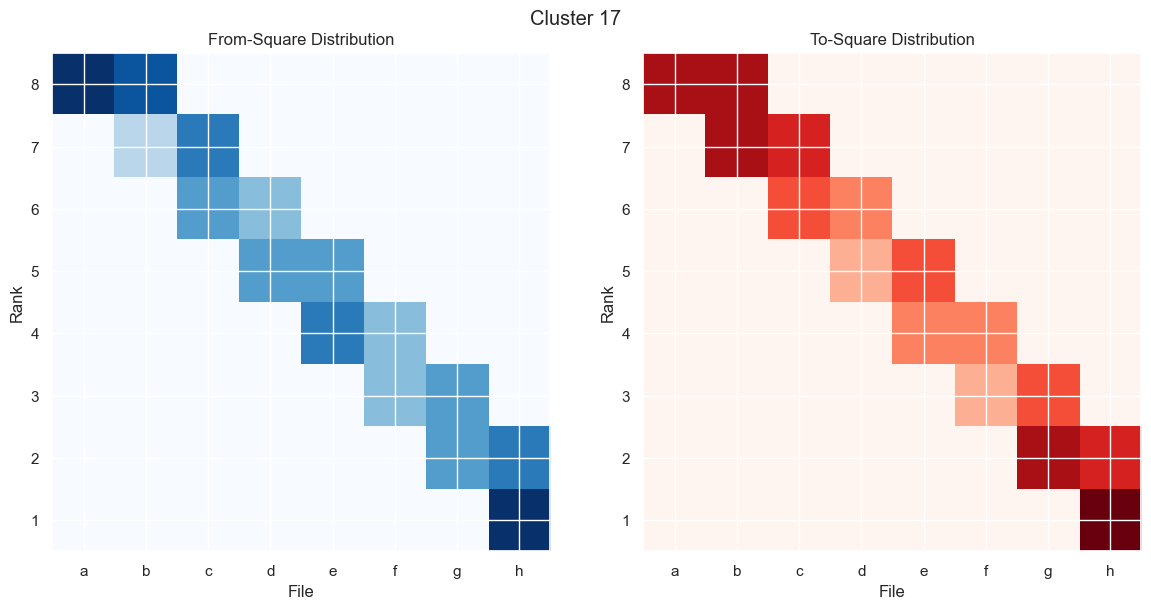

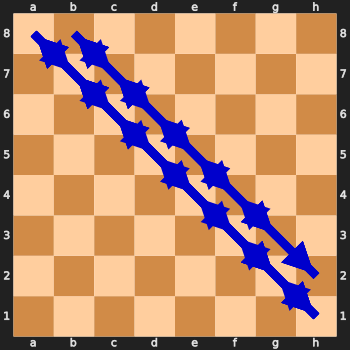

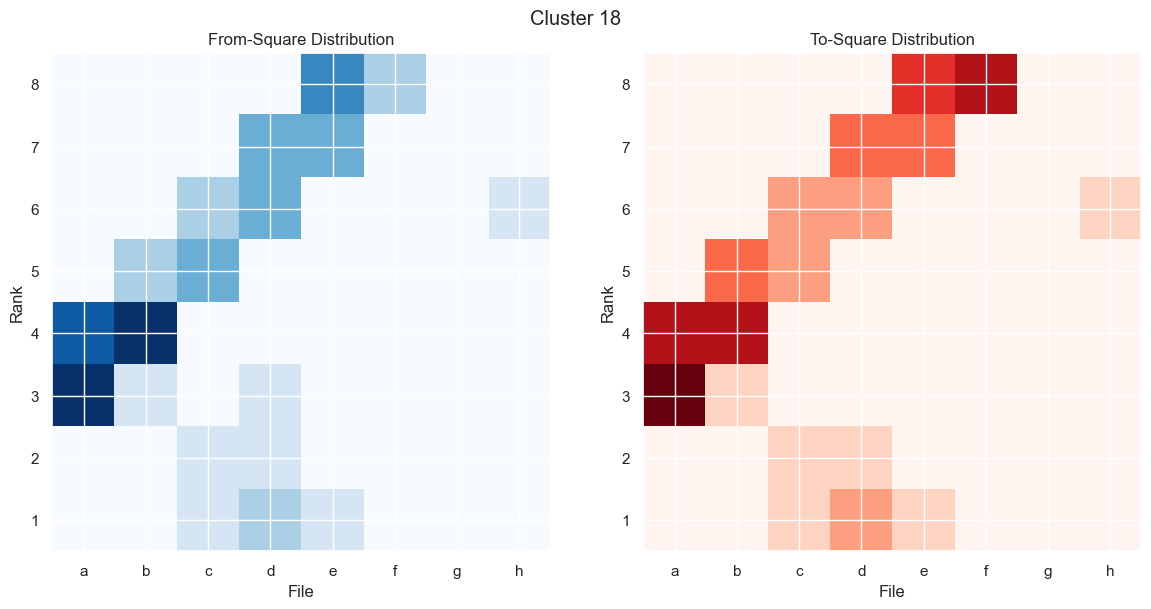

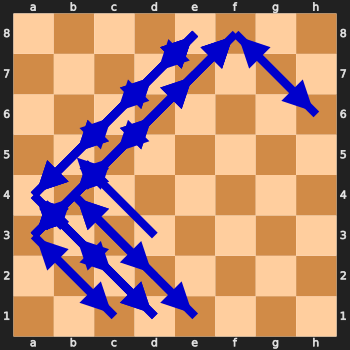

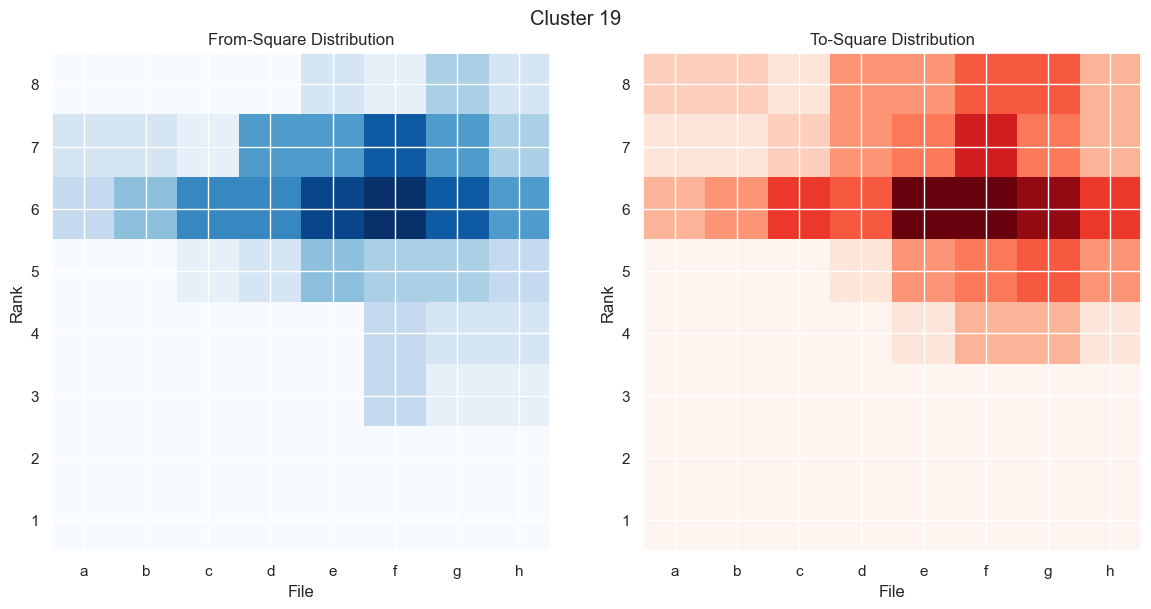

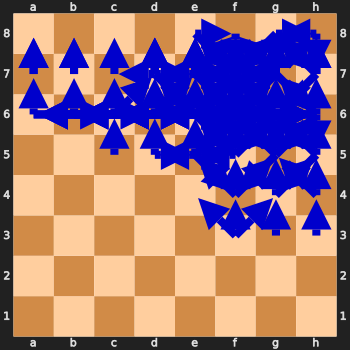

In [ ]:
maxCluster = np.max(clusters)
for i in range(maxCluster + 1):
    clusterMoves = dictionaty[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()

Number of clusters found: 1
Percentage of noise points: 0.004373974849644614


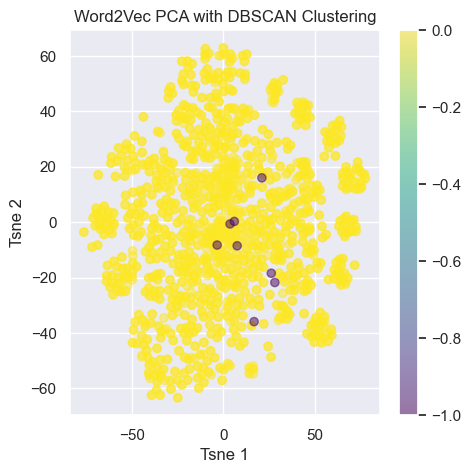

In [ ]:
#DBscan clustering using cosine distance
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.48,min_samples=2, metric='cosine')

dbscan.fit(wordVectors)
clusters = dbscan.labels_
maxCluster = np.max(clusters)

#Print the number of clusters found
print(f'Number of clusters found: {len(set(clusters)) - (1 if -1 in clusters else 0)}')
print(f'Percentage of noise points: {list(clusters).count(-1)/len(clusters)}')

#Print number of 

#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec PCA with DBSCAN Clustering')
plt.xlabel('Tsne 1')
plt.ylabel('Tsne 2')
plt.colorbar()
plt.show()


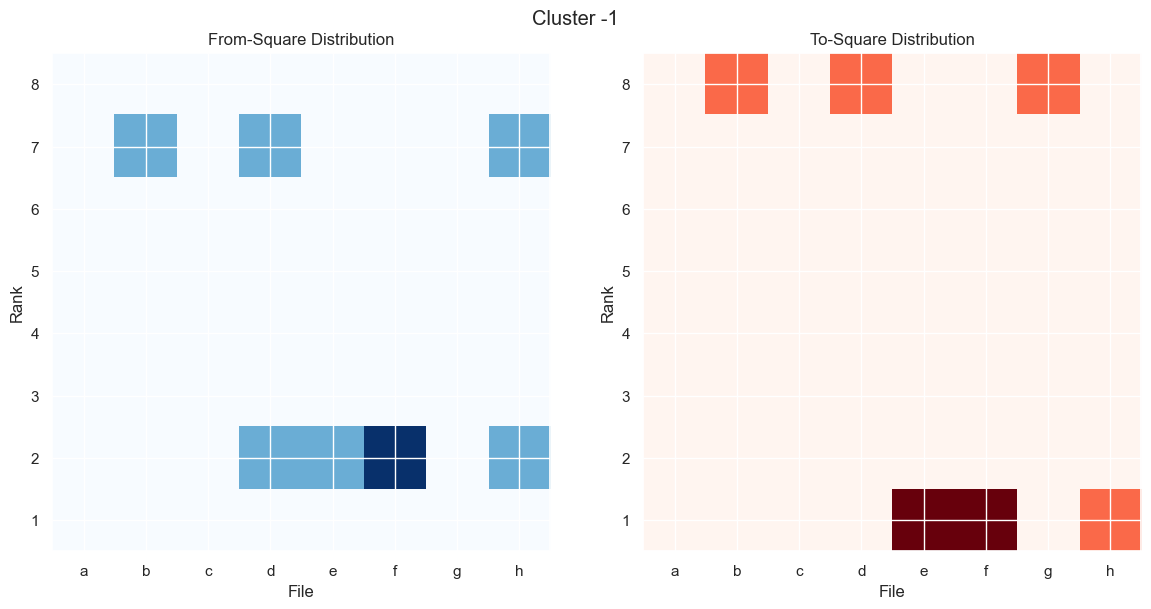

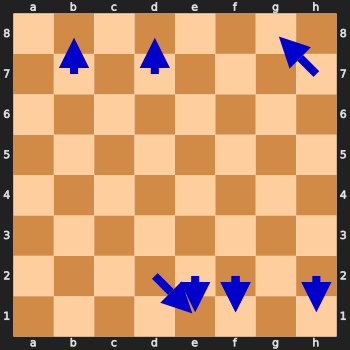

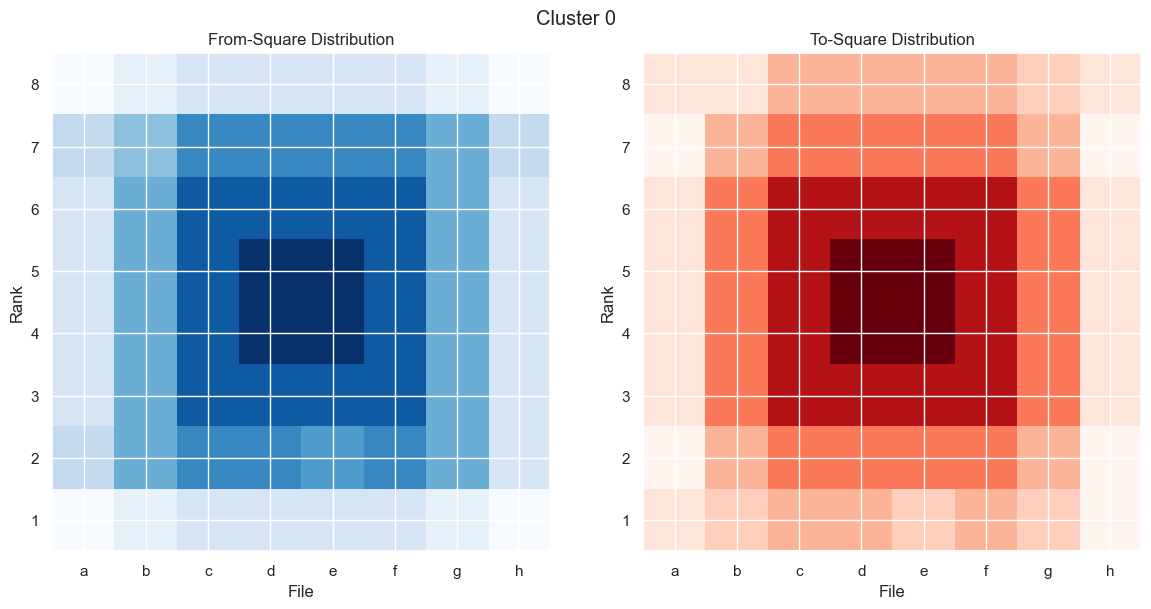

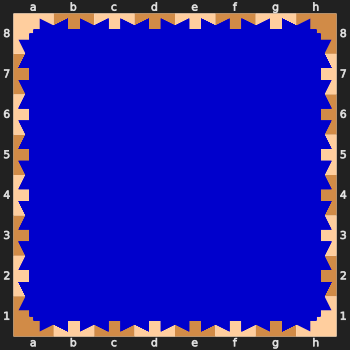

In [ ]:
#Plot the clusters using the move plotter
for i in range(-1, maxCluster + 1):
    clusterMoves = dictionaty[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()

For n_clusters = 2, the silhouette score is: 0.1395
For n_clusters = 3, the silhouette score is: 0.0385
For n_clusters = 4, the silhouette score is: 0.0493
For n_clusters = 5, the silhouette score is: 0.0300
For n_clusters = 6, the silhouette score is: 0.0218
For n_clusters = 7, the silhouette score is: -0.0156
For n_clusters = 8, the silhouette score is: -0.0068
For n_clusters = 9, the silhouette score is: -0.0013
For n_clusters = 10, the silhouette score is: 0.0026
For n_clusters = 11, the silhouette score is: 0.0015
For n_clusters = 12, the silhouette score is: -0.0013
For n_clusters = 13, the silhouette score is: -0.0002
For n_clusters = 14, the silhouette score is: 0.0030
For n_clusters = 15, the silhouette score is: -0.0058
For n_clusters = 16, the silhouette score is: -0.0022
For n_clusters = 17, the silhouette score is: -0.0009
For n_clusters = 18, the silhouette score is: 0.0033
For n_clusters = 19, the silhouette score is: 0.0044
For n_clusters = 20, the silhouette score is: 

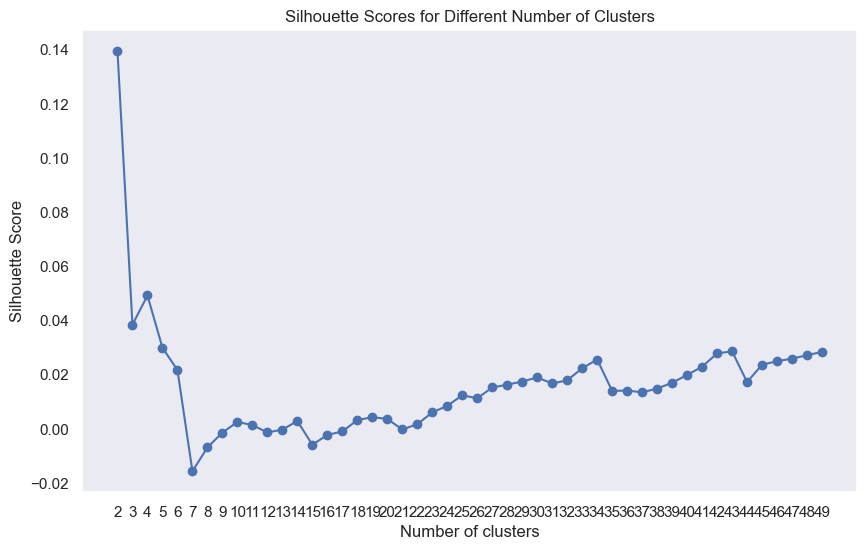

In [ ]:
#Cluster with Kmean with elbow method with cosine distance

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

# Compute the cosine distance matrix
cosine_distance_matrix = pairwise_distances(wordVectors, metric='cosine')
# Compute the silhouette scores for different values of k
silhouette_scores = []
range_n_clusters = range(2, 50)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(cosine_distance_matrix)
    silhouette_avg = silhouette_score(cosine_distance_matrix, cluster_labels, metric='precomputed')
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg:.4f}")

best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Best number of clusters: {best_n_clusters}")
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

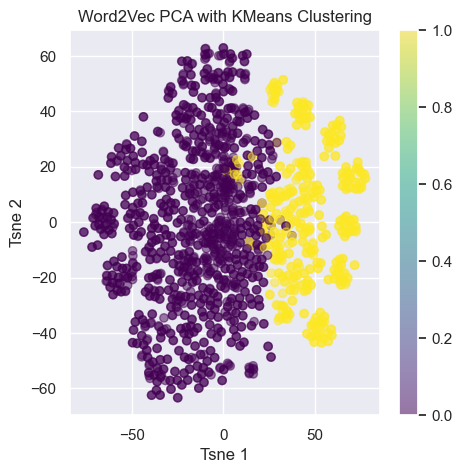

In [ ]:
kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
kmeans.fit(wordVectors)
clusters = kmeans.labels_

#Plot the first two components
plt.figure(figsize=(5, 5))
plt.scatter(wordVectorsTSNE[:, 0], wordVectorsTSNE[:, 1], c=clusters, alpha=0.5, cmap='viridis')
plt.title('Word2Vec PCA with KMeans Clustering')
plt.xlabel('Tsne 1')
plt.ylabel('Tsne 2')
plt.colorbar()
plt.show()

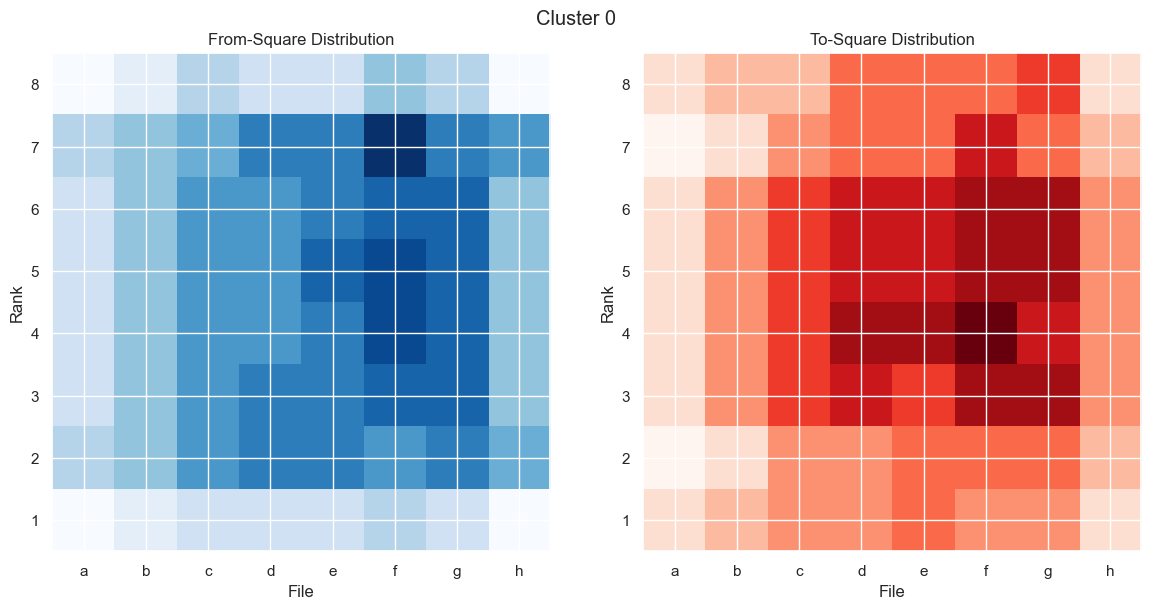

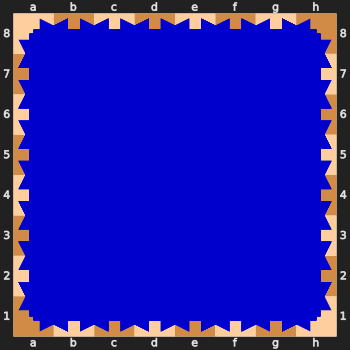

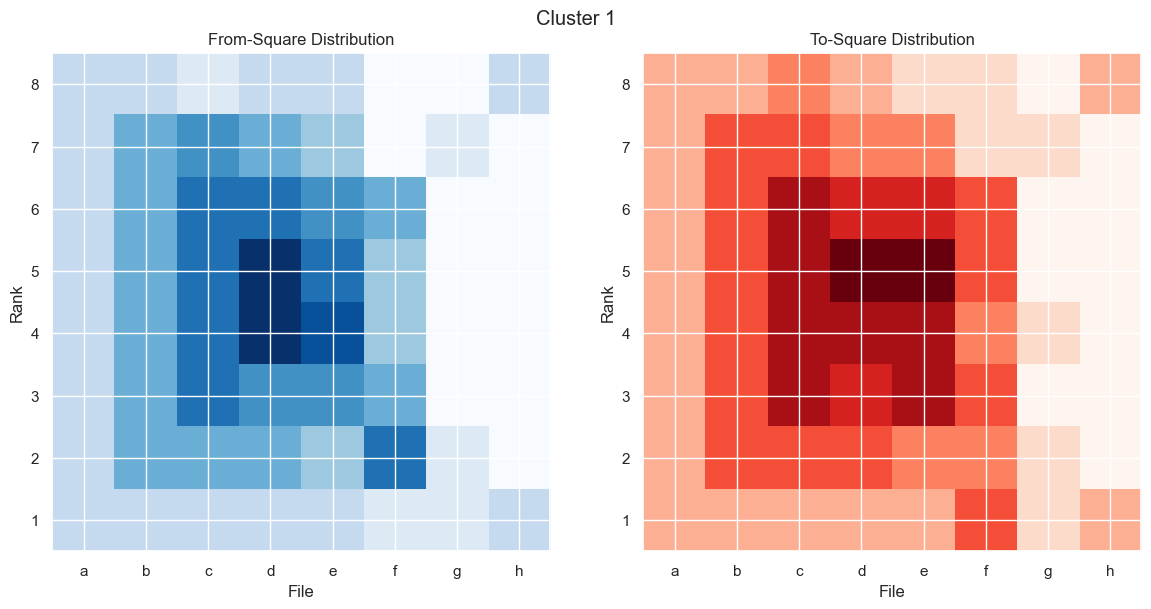

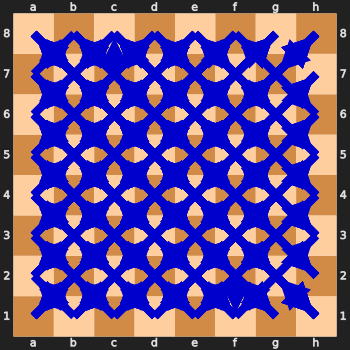

In [ ]:
#plot the clusters using the move plotter
for i in range(best_n_clusters):
    clusterMoves = dictionaty[clusters == i]
    movePlotter = MovePlotter(title=f'Cluster {i}')
    for move in clusterMoves:
        movePlotter.addMove(move)
    movePlotter.plot()